# 第4章: 形態素解析

time requird: 3hours

---

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [2]:
%%bash

# download
if [ ! -f neko.txt ]; then
    wget http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
fi
head neko.txt

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。


In [3]:
%%bash

# call mecab
if [ ! -f neko.txt.mecab ]; then
    sed 's/^　//' neko.txt > neko_noindent.txt
    mecab neko_noindent.txt > neko.txt.mecab
fi
head neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS


## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ

In [4]:
def morph_dic(line):
    surface = line.split('\t', 1)
    elem = surface[-1].split(',')
    dic = {'surface': surface[0],
           'base': elem[-3],
           'pos': elem[0],
           'pos1': elem[1]}
    return dic

In [5]:
from codecs import open

doc = []
with open('neko.txt.mecab', 'r', encoding='utf8') as f:
    sent = []
    for line in f.readlines():
        line = line.strip()
        if '\t' in line: # if not EOS:
            sent.append(morph_dic(line))
        else:
            if len(sent) > 0:
                doc.append(sent)
            sent = []
            
len(doc)

9220

## 31. 動詞

動詞の表層形をすべて抽出せよ．

In [6]:
for sent in doc:
    for morph in sent:
        if morph['pos'] == u'動詞':
            print(morph['surface'])

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
食う
思わ
載せ
られ
持ち上げ
られ
し
あっ
落ちつい
見
見
思っ
残っ
いる
さ
れ
し
逢っ
出会わ
し
のみ
なら
し
いる
吹く
せ
弱っ
飲む
知っ
坐っ
おっ
する
し
始め
動く
動く
分ら
廻る
なる
助から
思っ
いる
さり
し
出
し
いる
考え出そ
分ら
付い
見る
い
おっ
見え
隠し
しまっ
違っ
明い
い
られ
這い出し
見る
棄て
られ
這い出す
ある
坐っ
し
考え
見
出
し
泣い
来
くれる
考え付い
やっ
見
来
渡っ
かかる
減っ
来
泣き
出
ある
ある
し
そろ
廻り
始め
し
這っ
行く
出
這入っ
なる
思っ
崩れ
もぐり込ん
破れ
い
し
知れ
云っ
至る
する
なっ
いる
忍び込ん
分ら
なる
減る
降っ
来る
出来
なっ
あるい
行く
考える
這入っ
おっ
見る
し
逢っ
見る
つかん
抛り出し
思っ
ねぶっ
任せ
い
出来
見
這い
上っ
投げ出さ
れ
投げ出さ
れ
這い
上り
這い
上っ
投げ出さ
れ
繰り返し
し
いる
云う
なっ
し
やっ
下り
つまみ出さ
れよ
し
いい
出
来
ぶら下げ
向け
出し
出し
上っ
来
困り
いう
撚り
眺め
おっ
置い
やれ
這入っ
しまっ
聞か
見え
抛り出し
極める
し
合せる
帰る
這入っ
出
来る
思っ
いる
見せ
いる
いう
覗い
見る
し
いる
ある
読みかけ
ある
たらし
いる
帯び
あらわし
いる
食う
食っ
飲む
飲ん
ひろげる
読む
なる
垂らす
繰り返す
考える
ある
生れ
なる
限る
寝
い
勤まる
出来
云わ
せる
来る
鳴らし
いる
住み込ん
行っ
跳ね
付け
られ
し
くれ
さ
れ
至る
つけ
くれ
分る
出来
得る
入れ
くれ
いる
つとめ
読む
乗る
する
乗る
構い
やむを得ん
寝る
し
入っ
もぐり込ん
ねる
なる
入っ
寝る
見出し
割り込む
醒ます
なる
来
来
いっ
泣き
出す
さまし
飛び出し
くる
叩か
れ
し
すれ
する
せ
得
なっ
する
至っ
し
かぶせ
抛り出し
押し込ん
する
しよ
追い廻し
加える
磨い
怒っ
入れ
え
い
する
逢う
言っ
産まれ
持っ
行っ
棄て
来たそ
流し
話し
する
戦っ
せ
なら
いわ
れ
思う
隣り
解し
い
いっ
し


呼ば
れ
捕まっ
い
出し
出る
し
響い
驚かさ
れ
見渡し
見え
巻き込ま
れ
出る
行き
云う
起っ
訴える
求める
刺し通し
行き
答え
出し
眺め
呼ぶ
洩れ
来る
思わ
れ
思い
乗り
呼ん
飛び込も
し
見つめ
いる
浮い
来る
思っ
込め
飛び上がっ
おい
落ち
しまい
飛び込ん
ぱちつかせ
問う
行こ
思わ
つまむ
飛び込ん
なっ
さめ
見る
ある
濡れ
飲ん
し
飛び込ん
気が付い
い
見渡す
驚き
飛び込ん
い
間違っ
飛び下り
出る
行く
出来
笑い
し
いる
似
いる
なる
云う
し
驚かす
なっ
する
行き
突い
い
し
見え
開い
ある
負け
出す
ある
ある
笑う
欠け
着い
いる
まぜ返す
違う
聞かし
くれろ
云う
連れ
行っ
やら
聞い
し
云う
よそ
し
なる
持っ
来
云う
よそ
云う
し
引き下がっ
なる
云う
聞き
知ら
聞か
せる
行っ
下す
い
する
行き
行っ
しい
云う
懸け
行っ
這入
れる
云う
行く
云う
在っ
し
する
踏ま
脱し
する
やめよ
云う
し
知り
踏ま
聞い
来
かかる
し
すみ
泣く
出す
行く
しよ
くっ
行こ
する
行く
着く
し
いけ
し
はいら
れ
行か
聞き返す
行っ
とら
這入
れ
教え
られ
述べる
過ぎれ
押し
見
答える
し
出し
聞く
し
いら
明い
する
起る
思う
し
動け
なっ
加える
困っ
なっ
叶え
やり
叱りつけ
聞か
さ
せ
さ
せ
する
酬い
ある
ある
連れ
行け
行か
れる
行き
連れ
行っ
やり
連れ
行っ
やり
し
くらん
乗る
降りる
出来
思う
し
くらん
くる
見
もらっ
し
する
し
やる
帰ら
なり
上げ
云う
困っ
飲め
いる
思う
行か
喜ぶ
見
云う
外れ
なっ
来る
し
いらっしゃれ
聞く
行く
行く
直っ
見せる
し
いる
洗っ
着
換え
待っ
いる
云っ
しく
なる
する
し
する
出来
する
知れ
なっ
来
し
考える
説き
聞かし
起っ
取り乱さ
さ
せる
考え出し
呼ん
呼ん
云う
心得
いる
聞く
知る
知ら
使っ
からかう
出来
なさら
あり
し
折ら
れ
しまっ
する
使っ
愛する
出
さ
れ
乱れ
い
もっ
来
呑み込ま
せよ
急き込ん
知ら
云う
忘れ
付か
使っ
しまっ
考える
なる
する
命ぜ
られ
行っ

食っ
てる
死ん
い
ある
し
持っ
出
叩い
てる
見つかっ
食っ
負け
なっ
く
叩い
なる
よし
くれ
言っ
とっ
転がし
しまっ
起せ
云う
傭う
待っ
くれ
云っ
表する
起さ
背く
云う
し
唸っ
すまし
する
立て
思っ
覚え
いる
知っ
てる
覚え
いる
彫っ
あっ
し
いる
出来
い
引き
越す
盗ん
行き
叶っ
振り
廻す
する
し
おい
さ
なら
云う
す
云う
思っ
引き裂い
しまっ
し
振
なくなっ
折ら
れ
ある
し
いけ
食い
割り込ん
来る
し
受ける
詫び
云う
咲い
い
散る
云う
する
云う
出来る
遣
云っ
見え
寄ら
疑う
しよ
云う
受け
奢り
っ
こか
極め
書く
遣
思っ
し
奢る
起す
立っ
立っ
書か
散っ
なくなっ
いる
有り
つい
思っ
すまし
取り合わ
つけ
入れる
せ
張る
書か
する
云っ
譲ら
する
あっ
し
忘れ
しまっ
散る
出来
奢る
威張っ
いる
し
がっ
いる
おら
違っ
いる
知れ
怒っ
いる
埋
する
探し
いる
怒ら
待っ
いる
云え
来
くる
出来
起し
知っ
いる
見識張っ
やる
思っ
ある
し
やる
見
いる
知れ
聞い
話し
いけ
話し
いけ
する
通じ
逢っ
受け
なっ
云わ
れる
し
思い出す
思い出す
あり
なる
しかけ
見や
なら
貰お
なる
出来
喰う
燻っ
い
仕上がっ
思う
塗っ
やり
書き
かけ
除け
し
聞く
云う
疑
分ら
する
云う
聞く
する
気が付か
し
ある
し
見せ
なっ
垂れる
あり
朽ち
来
してやろ
変ら
立てる
来
聞い
述べる
云う
し
くば
せ
する
し
する
貰え
貰え
がっ
し
いる
せ
せ
し
汚す
言っ
聞か
せる
なる
なる
崇め
奉る
云う
する
行か
思う
変ら
変っ
い
受け
する
褒める
かける
し
重んじ
出し
講じ
与え
云う
怪しん
い
合せる
至っ
し
抜く
得
達し
合わ
云う
する
始まっ
云わ
叩い
向い
いる
弁じ
つづける
なる
し
疑
救い出し
くれ
思う
あっ
せら
叩か
し
い
いか
おい
得る
演ずる
なり
なる
至っ
与えん
する
ある
与え
あろ
ある
やれ
損する
なる
積み
傾け
尽し
与えん
し
考え
釣り合う
云う
観
破
し
云う
やら
し
しまっ
出来る
し
臨ん
見る
つけ
も

行く
残る
ぶら下げ
いる
見る
し
いる
察せ
られる
よる
障
触れ
なら
する
食い
殺さ
れ
し
思わ
れる
こせつい
いる
ある
見
なっ
云う
なる
し
くれ
頼ん
負え
し
云う
起し
云う
刈り
考え出す
し
はおら
れ
なり
着
通さ
れる
する
云う
つ
過ぎる
出来
怠っ
する
しよ
考え
見
劣ら
やる
なっ
せ
し
する
来る
呈し
遠ざかる
来
思っ
いる
知ら
浴びる
ある
浴びる
入れ
いる
響き
渡る
出す
来
やる
っ
いる
来
潰せる
思っ
いる
拭い
入れ
上っ
来
し
呼ばわり
抛り出す
突っ伏し
寝
いる
答える
し
い
醒め
出
来る
着
陣取っ
し
いる
いら
云っ
存じ
かい
する
いえ
来
掛け
貰っ
生き
帰っ
あり
し
おり
出る
とら
変り
し
致し
やり
寝
られ
寝
られりゃ
並べ
見
見え
寝
来る
寝
いる
見る
い
答える
載せ
てる
退
され
云っ
載っ
てる
もぎとる
行か
し
いる
載っけ
おく
ある
坐っ
い
られ
なり
なり
云う
寝
い
し
思っ
云い
いじっ
見る
はね
し
見
云う
なさっ
焼け
い
置く
思っ
溶かし
落し
思う
行き
なら
おり
読ん
いる
来
忘れ
しまっ
なっ
思い出し
上っ
見
なっ
おり
流れ
しまい
寄せ
し
なる
なり
這う
し
施す
なら
云う
言っ
いる
知れ
ざんす
いえ
する
乗っ
言う
果せる
分ら
し
施す
懲り
いる
云っ
問い返さ
問い返さ
れ
持ち出し
存じ
し
云う
及び
言い兼ね
云っ
引っ張っ
来
云う
おっしゃれ
云う
心得
いる
知ら
思い
し
見
なっ
寝
いる
寝
いる
来
盗ん
持っ
引い
行っ
覚まし
い
尋ね
ある
い
分ら
分ら
つけ
ある
し
連れ
行っ
引きずっ
行っ
し
忘れ
いる
し
変ら
出
くる
やる
あり
死ん
見る
起し
いらっしゃい
する
見え
困り
る
く
いただい
立ち
かける
いただか
し
聞き
せ
する
どき
気が付き
し
合う
並べる
悟っ
蒙る
来
いただき
出来
述べる
云っ
い
る
省け
云う
し
いる
寝つき
掛っ
扱か
れ
出
来る
変ら
寝よ
し
する
驚かし
奉っ
済ま
分ら
する
着い
出し
吸い
始め
転がっ
いる
つけ
買っ
云っ
差し出す
撫で
廻
わす
言う
聞

つい
すれ
さ
れる
遣
し
打ち
崩し
する
あっ
し
潜り
得る
いえ
出来る
遣
し
しまっ
ぬけ
くる
しまい
し
出来
える
飛び越える
なっ
出来
出来
飛び込む
し
追い
懸け
られ
逃げる
いる
逃げる
入れ
捕え
し
いる
し
いる
いる
入ら
し
いる
あけ
曲っ
見る
眺める
眺める
いる
見渡す
出来る
見出し
云っ
捕える
行か
叱りつける
し
突こ
すれ
聞きつけ
下り
しまう
ぼっ
こ
し
いる
向っ
し
いる
云っ
開い
し
飛び出す
やる
し
なら
追っ
つか
云う
聞え
見え
見える
出せ
し
講じ
立て
籠っ
いる
し
出し
云う
ひやかす
聞こえよ
し
述べる
する
聞く
騒い
いる
あばれ
いる
し
する
出
懸け
来
逃げ出す
い
する
する
思っ
おら
する
まかり
越し
見て取る
し
つく
する
響く
揚げ
怒鳴りつけれ
周章てる
引きあげる
用い
られる
する
這入っ
いる
思っ
持っ
出
懸ける
い
い
思っ
のぞく
這入っ
いる
廻っ
見
覗い
見
覗い
見
廻っ
見
言っ
云っ
繰り返し
いる
疲れる
分ら
し
来
達し
起っ
出る
読ん
上る
唱う
上る
上る
ある
よる
し
おっ
怒
云う
ある
上る
出す
づく
ある
上る
なる
する
する
進む
怒
なくなっ
至っ
し
いる
云う
話し
する
あら
思わ
れる
極まっ
いる
ある
上る
上っ
熾ん
する
感じ
なる
集っ
なくなっ
する
云う
し
なら
する
上っ
降さ
なら
ある
なら
れ
あて
おら
れ
出
いる
欠く
する
試みる
す
ある
のぼせ
下げる
舂き
考え出し
坐っ
冷える
冷える
のぼせ
下がる
し
疑
挟む
かよう
用い
のぼせ
下げる
さ
れ
のぼせ
引き起す
さ
れ
考える
のぼせ
あっ
し
なら
ある
よる
逆上せん
出来
ある
重んずる
欠く
途切れる
れ
拱い
食う
なっ
しまう
なら
立ち行か
あっ
呼ぶ
もっ
し
申し合せ
称え
いる
する
し
持っ
し
し
云う
付け
おく
思う
見れ
せ
済む
する
執っ
する
折れる
見え
拵え
見せ
作っ
くれ
拵え
なら
とりのけ
悩まし
得る
食っ
食え
する
すれ
起る
来
ある
持っ
飛び込ん
飲ん
する
っ
いる
考え
よる
し
わかし
這入れ
返
ある
信じ
切っ


置い
破れ
見える
ある
見る
かい
ある
読み
なっ
捕え
こすり
つけ
やろ
怒っ
い
読ん
見
なる
云う
泣く
あてがえ
笑う
し
し
い
隔て
い
云う
見抜い
見え
たたき
泣い
笑っ
泣い
笑っ
取っ
歌っ
なっ
云う
せよ
泣い
笑っ
がっ
がっ
する
続い
云え
転ずる
し
云え
っ
っ
する
起き
かえ
読み
かかる
云わ
なる
とまっ
見る
ある
追っ
懸け
ある
い
い
見える
し
い
読め
よむ
ある
し
見る
なっ
し
いる
続く
遣
見える
見
し
おら
出
いる
読み
構わ
知れ
云う
受け
挙げる
する
行か
くば
し
もらい
し
挙げ
させ
し
聞く
よる
織
もっ
陥れる
ある
出し
雇っ
おく
する
き
転じ
見る
し
いる
する
する
読ん
来
こしらえ
向け
突き
あげ
極め
告げる
きか
え
出掛け
行っ
待ちかね
まくっ
畳ん
はじめる
洗い
し
し
いる
分け
終っ
かけ
なる
占め
云う
叩きつける
する
限ら
至っ
造っ
つか
拭き込ん
光る
かけ
引き立た
買っ
来
云う
買っ
貰っ
聞く
くれ
しから
盗ん
糺し
見る
おっ
死ん
頼ま
れ
ある
構え
引き払う
使っ
い
持っ
来
しまっ
考える
ある
思う
あつかい
つけ
いる
見え
くる
弁じ
させる
し
さ
れ
着
し
いる
し
いる
狂っ
くる
し
いる
もっ
ある
する
行か
ある
すれ
ある
陣取っ
控え
洗っ
行く
突き
込ん
すん
し
食っ
いる
見渡し
とん
有し
いる
すん
し
ある
至っ
放っ
出来
上っ
いる
し
たっ
はやる
考える
ある
し
なら
する
なる
する
なる
なっ
思う
せまら
れる
し
する
心得
いる
片付け
なら
し
いる
し
いる
片付ける
し
いる
持て余し
いる
持て余す
し
云う
入ら
し
苦しん
いる
云え
し
いる
知ら
たべる
おえ
とっ
利かし
あてがう
し
奪い
たくっ
持ち
あつかい
持ち
あつかっ
いる
見渡す
のさばり
出
登り
がる
し
いる
因っ
来る
癒せる
あきらめ
しまう
隣り
分捕っ
し
し
いる
使いこなせ
使お
する
せ
得
握っ
込ん
盛り込ま
れ
漲っ
いる
伝わる
保っ
い
受け
傾い
こぼれ
だす
する
込ん
上げ
持っ
行っ
上げ
られ
這入る
し
打ち
洩らさ


れ
話し
やろ
ある
よん
云う
あっ
開く
する
並べ
おく
いつわり
並べ
おく
きまっ
てる
来
聞く
云う
持ち
見合せよ
云う
きまっ
てる
変ら
云う
ぬから
云う
し
おく
構い
入っ
持っ
いらっしゃい
云う
行か
する
いただき
なる
いえ
及び
構い
云う
あっ
売
渡す
見
取りかかる
聞き
なる
思う
思う
思う
あり
払う
払え
繰り返し
いる
払う
なる
払う
なる
重ねる
したがっ
くれ
払わ
なる
迷っ
忘れる
云う
ある
乗じ
する
なら
笑う
云う
ある
せ
返し
断わら
れ
ある
し
云う
いる
述べ
聞い
笑う
払っ
考える
云う
聞い
だまさ
れ
し
いけ
かしこまり
致し
なる
向い
だし
し
云う
しろ
し
する
あずかり
あやまる
あり
あやまれ
命じ
蒙り
もっ
蒙り
見
変っ
てる
出来
出来
出来
くる
のしかかる
出来
云え
あれ
ある
のしかから
れる
感じ
する
し
違っ
出来
云う
あらわれる
し
考える
考え
られ
通る
云う
云え
過ぎ
し
すれ
ある
云う
出
くる
述べ
なる
き
し
押し通そ
する
乗っ
しよ
あせる
わから
黙っ
し
いれ
し
する
なる
かれ
申す
し
し
し
あっ
認め
られ
変る
し
出し
見
云わ
する
なる
逢え
買い
行き違う
なっ
なっ
なっ
なる
害する
出来
なっ
なっ
なくなっ
なっ
なる
なる
犯さ
れ
する
侵し
やろ
拡げ
なる
なる
なくなっ
生き
てる
なる
出来る
張りつめ
はち切れる
ふくれ
返っ
がっ
し
いる
求める
苦しん
し
制さ
這入っ
見
給え
し
いる
す
あっ
し
済む
張れる
張ら
なる
する
し
なら
進ん
いる
行わ
れ
いる
する
あっ
つく
借り
払っ
する
認め
払え
する
し
なら
離れ
離れ
し
いる
つれ
のび
行く
離れ
出来
離れ
離れる
分
れる
なる
いる
思っ
てる
違い
いっし
合わ
なら
し
云っ
見える
し
死ん
化ける
行か
し
穿い
鍛え上げ
乗り込ん
くる
思う
なる
なる
なれ
なる
する
すれ
する
合わ
なる
合わ
する
つく
し
いる
迎えれ
迎える
増し
くる
あっ
落ちつい
し
保っ
いれ
き
かける
下がっ
する
云う
分っ
くる
わかれる
云っ
わか
れる
わかれる
れる


## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [7]:
for sent in doc:
    for morph in sent:
        if morph['pos'] == u'名詞' and morph['pos1'] == u'サ変接続':
            print(morph)

{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '話', 'base': '話', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '装飾', 'base': '装飾', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '突起', 'base': '突起', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '運転', 'base': '運転', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '分別', 'base': '分別', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '決心', 'base': '決心', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '我慢', 'base': '我慢', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '餓死', 'base': '餓死', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '訪問', 'base': '訪問', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '始末', 'base': '始末', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '猶予', 'base': '猶予', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '遭遇', 'base': '遭遇', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '我慢', 'base': '我慢', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '記憶', 'base': 

{'surface': '話', 'base': '話', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '——', 'base': '*', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '質問', 'base': '質問', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '注意', 'base': '注意', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '——', 'base': '*', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '安心', 'base': '安心', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '回復', 'base': '回復', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '拝見', 'base': '拝見', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '拝見', 'base': '拝見', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '——', 'base': '*', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '撰', 'base': '撰', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '拝見', 'base': '拝見', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '撰', 'base': '撰', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '撰', 'base': '撰', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '——', 'base': '*', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '感心', 'base': '感心', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '舞踏', 'base': '舞踏', 'pos

{'surface': '遺伝', 'base': '遺伝', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '劇変', 'base': '劇変', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '発達', 'base': '発達', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '膨脹', 'base': '膨脹', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '論証', 'base': '論証', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '断念', 'base': '断念', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '主張', 'base': '主張', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '賛成', 'base': '賛成', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '断念', 'base': '断念', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '病気', 'base': '病気', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '——」「', 'base': '*', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '往来', 'base': '往来', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '往来', 'base': '往来', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '解釈', 'base': '解釈', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '自乗', 'base': '自乗', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '認定', 'base': '認定', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '行為', 'base

{'surface': '遊弋', 'base': '遊弋', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '反対', 'base': '反対', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '迂回', 'base': '迂回', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '密猟', 'base': '密猟', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '用意', 'base': '用意', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '辞職', 'base': '辞職', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '看破', 'base': '看破', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '探偵', 'base': '探偵', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '出所', 'base': '出所', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '判定', 'base': '判定', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '——', 'base': '*', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '使用', 'base': '使用', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '戦争', 'base': '戦争', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '記述', 'base': '記述', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '——', 'base': '*', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '徘徊', 'base': '徘徊', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '困却', 'base': 

{'surface': '解釈', 'base': '解釈', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '存在', 'base': '存在', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '研究', 'base': '研究', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '髣髴', 'base': '髣髴', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '伝染', 'base': '伝染', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '供', 'base': '供', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '破裂', 'base': '破裂', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '自慢', 'base': '自慢', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '保証', 'base': '保証', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '訓戒', 'base': '訓戒', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '心配', 'base': '心配', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '往来', 'base': '往来', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '勘定', 'base': '勘定', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '確信', 'base': '確信', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '洋行', 'base': '洋行', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '教育', 'base': '教育', 'pos': '名詞', 'pos1': 'サ変接続'}
{'surface': '意見', 'base': 

## 34. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ

In [8]:
for sent in doc:
    for i, morph in enumerate(sent):
        if morph['pos'] == u'名詞' and i < len(sent) - 2:
            morph1 = sent[i+1]
            morph2 = sent[i+2]
            if morph1['base'] == u'の' and morph2['pos'] == u'名詞':
                #print(sent[i:i+2])
                print(morph['surface'], morph1['surface'], morph2['surface'])
    

彼 の 掌
掌 の 上
書生 の 顔
はず の 顔
顔 の 真中
穴 の 中
書生 の 掌
掌 の 裏
何 の 事
肝心 の 母親
藁 の 上
笹原 の 中
池 の 前
池 の 上
一樹 の 蔭
垣根 の 穴
隣家 の 三
時 の 通路
一刻 の 猶予
家 の 内
彼 の 書生
以外 の 人間
前 の 書生
おさん の 隙
おさん の 三
胸 の 痞
家 の 主人
主人 の 方
鼻 の 下
吾輩 の 顔
自分 の 住
吾輩 の 主人
家 の もの
うち の もの
彼 の 書斎
本 の 上
皮膚 の 色
本 の 上
彼 の 毎夜
以外 の もの
主人 の 傍
彼 の 膝
膝 の 上
経験 の 上
飯櫃 の 上
炬燵 の 上
ここ の うち
供 の 寝床
彼等 の 中間
供 の 一
例 の 神経
性 の 主人
次 の 部屋
自分 の 勝手
吾輩 の 方
台所 の 板の間
吾輩 の 尊敬
向 の 白
玉 の よう
そこ の 家
家 の 書生
裏 の 池
親子 の 愛
もっとも の 議論
刺 の 頭
鰡 の 臍
彼等 の ため
軍人 の 家
代言 の 主人
教師 の 家
猫 の 時節
吾輩 の 家
家 の 主人
だらけ の 英文
胃弱 の 癖
後架 の 中
平 の 宗
月 の 月給
当分 の 間
下 の よう
今更 の よう
主人 の 述懐
彼 の 友
金縁 の 眼鏡
主人 の 顔
内 の 想像
訳 の もの
利 の 大家
金縁 の 裏
吾輩 の 後ろ
彼 の 友
吾輩 の 輪廓
顔 の あたり
上乗 の 出来
顔 の 造作
他 の 猫
不器量 の 吾輩
吾輩 の 主人
斯産 の 猫
斑入り の 皮膚
主人 の 彩色
一種 の 色
身内 の 筋肉
主人 の 予定
座敷 の 中
悪口 の 言いよう
人 の 気
彼 の 背中
こっち の 便利
自己 の 力量
人間 の 不徳
吾輩 の 家
家 の 裏
浩然 の 気
小春 の 穏
日 の 二
茶 の 木の根
西側 の 杉
垣 の そば
他 の 庭
純粋 の 黒
彼 の 皮膚
皮膚 の 上
毛 の 間
中 の 大王
吾輩 の 倍
嘆賞 の 念
好奇 の 心
彼 の 前
小春 の 風
垣 の 上
梧桐 の 枝
枚 の 葉
枯菊 の 茂み
真丸 の 眼
人間 の 珍重
双眸 の 奥
吾輩 の 矮小
額 の 上
声 の 底
吾輩 の 心臓

他 の 方面
方面 の 事
畏服 の 念
子 の 方
天が下 の 一隅
世の中 の 人間
金田 の 妻
どこ の 会
人 の 前
私 の 家
横丁 の 角屋敷
僕 の 伯父
伯父 の 友達
君 の 伯父
迷亭 の 方
様 の ——
娘 の 縁辺
縁辺 の 事
こちら の 身分
主人 の 方
あなた の 所
寒月 の 事
上 の 関係
君 の 性行
性行 の 一
寒月 の 事
双方 の 間
団扇 の よう
心 の 裡
寒月 の 方
主人 の 鉄砲
子 の 一言
狐付き の よう
御存じ の 事
去年 の 暮
向島 の 阿部
入り の 指
膝 の 上
病人 の よう
驚愕 の 箍
持前 の 本態
参考 の ため
金田 の 奥さん
車屋 の 神
さん の 事
車屋 の 神
さん の 事
寒月 の 事
誰 の 事
車屋 の 神
あなた の 垣根
垣根 の そ
向う の 勝手
新道 の 二絃琴
二絃琴 の 師匠
寒月 の 事
子 の 言葉
軍鶏 の 蹴合い
悪口 の 交換
子 の 敵
寒月 の 方
迷亭 の 救い
さん の 方
流 の 言葉
博士 の 夫人
こっち の 手
博士 の 奥さん
さん の 気
君 の 事
地球 の 磁気
磁気 の 研究
ただ の 学士
ほか の 事
地球 の ——
首縊り の 力学
研究 の 結果
何 の 気
首縊り の 力学
主人 の 方
これしき の 事
夫人 の 面目
相手 の 顔色
主人 の 顔
団栗 の スタビリチー
天体 の 運行
上 の 質問
歯 の 性
迷亭 の 機嫌
内 の 二
枚 の 絵葉書
旧暦 の 歳
歳 の 夜
山 の 狸
不平 の 体
天女 の 鼻
人 の 天文学
者 の 死骸
本当 の 噺
つき の 爺
何 の 事
泊り の 十
荒磯 の 千鳥
覚 の 千鳥
波 の 底
大抵 の 質問
寒月 の 事
自分 の 方
方 の 事
奥 の 部屋
月並 の 標本
顔 の 中央
猫背 の 鼻
奥 の 間
車屋 の 神
顔 の 讒訴
子 の 鼻
自分 の 容貌
裏 の 車
歳 の 高齢
あなた の よう
主人 の 寿命
木綿 の 羽織
だらけ の 着物
金田 の 奥さん
さん の 名前
着物 の 咎
贅沢 の 沙汰
任意 の 庶境
克己 の 力
ステッキ の 代り
細君 の 方
此年 の 春
伯父 の 伯父
国 の 新聞
例 の 

腹合せ の 帯
縮緬 の 腹合せ
腹合せ の 帯
糸織 の 羽織
河野 の 叔母さん
叔母さん の 形
今 の 糸織
円 の 羽織
泥棒 の ところ
すそ の オタンチン・パレオロガス
俺 の 着物
オタンチン・パレオロガス の 意味
品物 の 方
針箱 の 前
山の芋 の 寄贈
家 の 書生
会社 の 鉱山
家 の 芽生
君 の 後進
以前 の 関係
先生 の 草
細君 の 前
ズボン の まま
先生 の ごと
たま の 日曜
先日 の 約束
君 の 顔
唐津 の 山の芋
山の芋 の 好き
君 の 方
私 の 顔
君 の 頭
頭 の 後部
さん の 頭
さま の よう
夕べ の 泥棒
泥棒 の 頭
妹 の 質問
さん の 頭
禿 の 事
先生 の 書斎
俺 の ジャム
うち の もの
本 の 事
犬 の 大
書生 の うち
卒業 の 日
個 の 法学
会社 の 役員
吾輩 の 驚愕
世 の 行為
君 の 御蔭
合せ の 護身
今 の うち
君 の 鍋
鍋 の 中
隅 の 方
君 の 声
さん の よう
良人 の 肩
何 の 役
性 の 笑
望外 の 幸福
銷沈 の 体
半袖 の シャツ
胃 の ため
手足 の 方
詩 の 句
細君 の ため
心 の 裏
主人 の 返事
主人 の 方
手 の つけ
あなた の 月給
細君 の 質問
会社 の 方
線 の 株
円 の 収入
君 の ところ
ところ の 書生
小石川 の 寺
九州 の 炭坑
朋友 の よう
主人 の よう
主義 の 人
金銭 の 観念
普通 の 人間
家 の 利益
先生 の ところ
寒月 の 名
君 の 特色
水島 の 事
行き当りばったり の 多々良
あすこ の 団子
辺 の 逸事
探偵 の 必要
万物 の 旻
生息 の 義務
何等 の 能
五感 の 刺激
何等 の 活動
壁 の 隙
大師 の 眼
頭 の 中
静坐 の 工夫
一室 の 中
躄 の 修行
中 の 活力
粛 の 態
天下 の 凡眼
これら の 知識
仮死 の 庸
無用 の 長物
誹謗 の 声
これら の 凡眼
彼 の 多々良
第一流 の 人物
古今 の 書籍
事物 の 真相
雪 の 詩
以外 の 活動
霊 の 光輝
金 の 事
不明 の 結果
君 の 膳
来 の 猫
千金 の 子
身 の 危険
自己 の 災
日本 の 猫
吾輩 の 事
鼠 

主人 の 屋敷
館 の 境
君子 の 挙動
挙動 の 変化
吾輩 の よう
当家 の 令嬢
館 の 君子
二つ の 要素
小犬 の 喧嘩
駱駝 の 周囲
何 の 気
場合 の 適例
虎 の よう
髯 の 数
囚人 の 一
無聊 の あまり
房 の 壁
一種 の 娯楽
人 の 気
大名 の よう
頭 の 発達
活気 の 使い道
自己 の 優勢
自己 の 優勢
目的 の とき
自己 の 優勢
必然 の 結果
自分 の 勢力
事実 の 上
頭 の うち
ただ の 一
鰹節 の 一
吾輩 の 考
奥山 の 猿
学校 の 教師
学校 の 教師
奥山 の 猿
承知 の 通り
奥山 の 猿
館 の 教師
館 の 生徒
自己 の 鼻
教育 の 功
十分 の 休暇
これら の 条件
野暮 の 極
抜 の 骨頂
館 の 生徒
目 の 間
館 の 校長
猫 の ため
角 の 穴
清国 の 奇術
垣 の 功
主人 の 論理
呑舟 の 魚
学校 の 生徒
粗末 の 垣
線 の 区域
目垣 の 穴
乱入 の 虞
四角 の 目
何 の 事
北側 の 空地
座敷 の 正面
東 の 離れ
北側 の 空地
反対 の 方角
鉤 の 手
後架 の 窓
窓 の 格子
格子 の 中
方 の 不利
敵 の 声
声 の 出所
垣 の 内
桐 の 木
木 の 附近
主人 の 眼
逆上 の 頂点
下 の 事件
人 の 伝説
人 の 体内
種 の 液
昔 の よう
血液 の 分量
合 の 割合
その他 の 局部
打 の 当時
警察 の 逆上
体内 の 各部
主人 の 先君
息災 の 徴
坊主 の 慣用
一所不住 の 沙門
行脚 の 衲僧
難行苦行 の ため
石 の 上
自然 の 順序
何等 の 能
違 の 異名
彼等 の 仲間
逆上 の 名
彼等 の 肩
種 の 逆上
発明 の 売薬
売薬 の よう
彼等 の ため
蒲鉾 の 種
観音 の 像
南蛮 の 材料
屋 の 牛鍋
臨時 の 気
臨時 の 気
生涯 の 狂人
学者 の 頭脳
湯 の 中
人 の 説
酒 の 湯
古人 の 真似
人 の 態度
酔っぱらい の よう
酒飲み の よう
本 の 間
有名 の 大家
大家 の 所作
船 の 上
文章 の 趣向
今日 の ところ
不可能 の 事
時機 の 到来
人文 の ため
時機 の 一
逆上 の 説明
事件 の 前
主人

様 の 前
様 の 前
町内 の もの
婦人 の 会
明治 の 代
文明 の 弊
開化 の 業
竹 の よう
夫婦 の 間
姑 の 間
葛藤 の 三
不幸 の 源
多く の 婦人
金田 の 富子
金田 の 富子
さん の 学校
かた の よう
さん の 倍
方 の 所
あなた の ため
無上 の 名誉
心臓 の 形
三角 の 中心
キューピッド の 矢
友達 の うち
さん の とこ
愛 の 方
夫婦 の 関係
青春 の 気
細君 の 方
あまり の 事
車 の 音
例 の 有名
長火鉢 の 傍
様 の もの
異様 の 陶器
さん の 顔
障子 の 方
鉄 の 門
教師 の 身
日本 の 警察
日本 の 警察
私 の 帯
帯 の 片側
帯 の 片側
大切 の 時間
供 の 癖
頃 の 女学生
未来 の 考
無用 の 長物
無用 の 長物
保険 の 必要
こないだ の よう
御前 の 学校
人 の もの
竹 の 真似
何 の 真似
愚物 の 癖
一掬 の 涙
紫 の 袴
袴 の 上
袴 の 上
さん の 顔
学校 の 生徒
さん の 泣顔
研究 の ため
大方 の 人
大方 の 人
作用 の ため
さん の 紅涙
現象 の 一つ
不可測 の 心
天下 の 女性
主人 の よう
吾輩 の 毛
旋毛曲り の 奇特
主人 の あと
舞台 の 役者
猫 の 命
命 の うち
多く の 経験
今度 の お客
地 の 隙
顔 の 真中
座敷 の 隅
隅 の 方
主人 の よう
主人 の 持説
ナポレオン の よう
通例 の 書生
畳 の 上
泥棒 の よう
素足 の 責任
目 の 足跡
足跡 の 上
頭 の つんつるてん
つんつるてん の 乱暴
恭謙 の 君子
盛徳 の 長者
人 の 気
鼻 の 先
更紗 の 座布団
ため の 布団
主人 の 顔
さん の 法事
法事 の 時
時 の ほか
足 の 先
後ろ の 襖
碗 の 茶
妙齢 の 女性
立て の 小笠原
苦悶 の 体
先刻 の 無念
一滴 の 紅涙
紅涙 の あと
無言 の まま
今 の 名
昔 の 名
甲 の 組
わたし の 監督
入学 の 当時
主人 の 眼
自分 の 監督
組 の 生徒
心 の 裏
自分 の 監督
何 の ため
主人 の 事
学校 の 生徒
来訪 の 主意
人 の 家
一身上 の 用事
君 の 様子


## 35. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [9]:
for sent in doc:
    chunks = []
    chunk = []
    for morph in sent:
        if morph['pos'] == u'名詞':
            chunk.append(morph['surface'])
        else:
            if len(chunk) > 1:
                chunks.append(chunk)
            chunk = []
    if len(chunks) > 1:
        for c in chunks:
            print('[%d nouns]' % len(c), '  '.join(c))

[2 nouns] 人間  中
[2 nouns] 一番  獰悪
[2 nouns] その後  猫
[2 nouns] 一  度
[2 nouns] この間  おさん
[2 nouns] 三  馬
[2 nouns] 二  人
[2 nouns] 一つ  床
[2 nouns] 一  人
[2 nouns] 最後  大変
[2 nouns] 物  指
[2 nouns] 尻  ぺたをひどく
[2 nouns] 筋  向
[2 nouns] 白  君
[2 nouns] 度  毎
[2 nouns] 白  君
[2 nouns] 先日  玉
[2 nouns] 四  疋
[3 nouns] 三  日  目
[2 nouns] 四  疋
[2 nouns] 白  君
[4 nouns] 我  等  猫  族
[3 nouns] 家族  的  生活
[3 nouns] 三  毛  君
[2 nouns] 所有  権
[3 nouns] 我々  同族  間
[2 nouns] 目  刺
[2 nouns] 一番  先
[2 nouns] 彼等  人間
[2 nouns] 我  等
[2 nouns] 白  君
[3 nouns] 三  毛  君
[2 nouns] 後架  先生
[2 nouns] 宗  盛
[2 nouns] 人  の
[2 nouns] 自ら  筆
[2 nouns] 眼鏡  越
[2 nouns] 一室  内
[2 nouns] 以太  利
[2 nouns] 大家  アンドレア・デル・サルト
[3 nouns] これ  一  幅
[2 nouns] 活  画
[2 nouns] 心中  ひそか
[2 nouns] いくら  アンドレア・デル・サルト
[2 nouns] 一  分
[2 nouns] あと  大
[2 nouns] 辛  棒
[4 nouns] 馬鹿  野郎  呼  わり
[2 nouns] 平生  吾輩
[2 nouns] 馬鹿  野郎
[3 nouns] 穏  かな  日
[3 nouns] 二  時  頃
[2 nouns] 昼飯  後
[2 nouns] 運動  かたがた
[4 nouns] 一  本  一  本
[2 nouns] 杉  垣
[2 nouns] 前後  不覚
[2 nouns] 庭  内
[2 nouns] 忍

[2 nouns] 杏仁  水
[3 nouns] 四  時  前
[10 nouns] many  a  slip  '  twixt  the  cup  and  the  lip
[2 nouns] 耶蘇  学校
[2 nouns] 甘木  君
[2 nouns] 三  時
[2 nouns] 四  時
[2 nouns] 一  時間
[2 nouns] 三  時
[3 nouns] 三  十  分
[2 nouns] 四  時
[3 nouns] 十  五  分
[2 nouns] 四  時
[2 nouns] 愚図  愚図
[2 nouns] 四  時
[5 nouns] 四  時  十  分  頃
[2 nouns] 甘木  先生
[3 nouns] 十  五  分
[2 nouns] 甘木  先生
[4 nouns] 十  五  分の  差
[2 nouns] 談笑  中
[2 nouns] 一  歩
[2 nouns] 俗骨  共
[2 nouns] 一つ  穴
[2 nouns] 言語  動作
[3 nouns] 文  切り  形
[2 nouns] 三  人
[2 nouns] 三毛  子
[2 nouns] 師匠  さん
[3 nouns] 門松  注目  飾り
[2 nouns] 十  日
[2 nouns] 一  流れ
[2 nouns] 四海  天下
[2 nouns] 一  度
[2 nouns] 十  坪
[2 nouns] 師匠  さん
[2 nouns] 三毛  子
[2 nouns] まま  椽側
[2 nouns] 転  ろ
[3 nouns] 猫  誉  信女
[2 nouns] どれ  どれ
[2 nouns] チー  ン
[3 nouns] 猫  誉  信女
[2 nouns] 南無阿弥陀仏  南無阿弥陀仏
[2 nouns] 師匠  さん
[2 nouns] チー  ン
[5 nouns] 猫  誉  信女  南無阿弥陀仏  南無阿弥陀仏
[2 nouns] 甘木  さん
[2 nouns] 甘木  さん
[2 nouns] 三  毛
[3 nouns] 三  毛  子
[2 nouns] 甘木  先生
[2 nouns] 三  毛
[2 nouns] 二  人
[2 nouns] 月桂寺  さん
[2 nouns]

[2 nouns] 陰  士
[2 nouns] 字  眉
[5 nouns] 二  十  六  七  歳
[2 nouns] 寒月  君
[2 nouns] 寒月  君
[2 nouns] しった  好男子
[2 nouns] 活動  小切手
[3 nouns] 金田  富子  嬢
[2 nouns] 念  入れ
[2 nouns] 製作  物
[2 nouns] 陰  士
[2 nouns] 引力  上
[2 nouns] 寒月  君
[2 nouns] 一  歩
[2 nouns] 寒月  君
[2 nouns] 眼  付
[2 nouns] 泥棒  君
[2 nouns] 寒月  君
[2 nouns] 琴瑟  調和
[2 nouns] 寒月  君
[2 nouns] 陰  士
[2 nouns] 泥棒  君
[2 nouns] 富子  嬢
[2 nouns] 一大  要件
[2 nouns] 二  本
[2 nouns] まま  微か
[2 nouns] 陰  士
[2 nouns] まま  室内
[2 nouns] 主人  夫婦
[2 nouns] 春  灯
[2 nouns] 六  畳
[2 nouns] 陰  士
[2 nouns] 二  分
[2 nouns] 陰  士
[3 nouns] 三  分の  二
[3 nouns] 四  寸  角
[5 nouns] 一  尺  五  六  寸
[2 nouns] 大事  そう
[4 nouns] 住人  多々良  三平  君
[2 nouns] 先日  帰省
[2 nouns] 陰  士
[2 nouns] 陰  士
[2 nouns] 大分  目方
[2 nouns] 乳  色
[2 nouns] 陰  士
[2 nouns] あなた  方
[2 nouns] 睡眠  中
[10 nouns] 明治  三  十  八  年  何  月  何  日  戸締り
[2 nouns] どこ  そこ
[2 nouns] どこ  そこ
[2 nouns] 何  点
[4 nouns] 右  告訴  及候  也
[2 nouns] 細  帯
[2 nouns] まま  どっか
[2 nouns] 宿場  女郎
[2 nouns] 出来  損
[2 nouns] 何  本
[2 nouns] 黒  繻子
[2 no

[2 nouns] 一  人
[2 nouns] 延命  息災
[2 nouns] 傷寒  論
[2 nouns] 濡れ  手拭
[2 nouns] 長寿  法
[2 nouns] 一  日
[2 nouns] ざる  者
[3 nouns] 沙門  雲水  行脚
[3 nouns] 樹下  石  上
[2 nouns] 気  違
[2 nouns] 気  違
[4 nouns] 一寸  八  分の  朽木
[2 nouns] 鴨  南蛮
[2 nouns] 下宿  屋
[2 nouns] 一  生涯
[2 nouns] 向う  間
[2 nouns] 気  違
[2 nouns] 毎日  渋柿
[3 nouns] 十  二  個
[2 nouns] かん  徳利
[2 nouns] 鉄砲  風呂
[2 nouns] 葡萄  酒
[2 nouns] 功  能
[2 nouns] 態度  動作
[2 nouns] 心的  状態
[3 nouns] 線香  一  本
[2 nouns] 間  我慢
[2 nouns] 快走  船
[2 nouns] 逆上  受合
[2 nouns] 早晩  随意
[2 nouns] 一  日
[2 nouns] 歴史  家
[2 nouns] 弊  竇
[2 nouns] 天  晴
[2 nouns] 張り  合
[2 nouns] 落雲  館
[2 nouns] 敵  軍
[2 nouns] 一  種
[2 nouns] 任意  これ
[2 nouns] 敵  中
[2 nouns] ダム  ダム
[2 nouns] 落雲  館
[2 nouns] 運動  場
[2 nouns] 間接  射撃
[2 nouns] 功  果
[2 nouns] 一  発
[2 nouns] 軍  力
[2 nouns] 威嚇  性
[2 nouns] 学者  作家
[3 nouns] みんな  営養  不足
[2 nouns] 先生  例
[3 nouns] 頭  ——  頭
[2 nouns] 時  イスキラス
[2 nouns] 一  羽
[2 nouns] 禿  岩
[2 nouns] 落雲  館
[3 nouns] 六  畳  敷
[2 nouns] 学者  作家
[2 nouns] 落雲  館
[3 nouns] ダム  ダム  丸
[3 n

[2 nouns] 雪江  さん
[2 nouns] 風呂敷  包
[2 nouns] 皿  眼
[2 nouns] 盗難  品
[3 nouns] 元来  九  時
[3 nouns] 十  一  時
[2 nouns] 三  時間
[2 nouns] 日本  服
[2 nouns] 油  壺
[2 nouns] 雪江  さん
[2 nouns] 言  ここ
[2 nouns] 心理  作用
[2 nouns] 雪江  さん
[2 nouns] 敷居  越
[2 nouns] お客  さま
[2 nouns] 生徒  さん
[2 nouns] 雪江  さん
[3 nouns] 神秘  的  作用
[3 nouns] 吾輩  猫  共
[2 nouns] 雪江  さん
[2 nouns] うち  はさ
[2 nouns] 油  壺
[2 nouns] 死  竜
[2 nouns] 蒸汽  喞筒
[2 nouns] 二六時中  間断
[2 nouns] 灼然  炳乎
[2 nouns] 旦那  様
[2 nouns] 大分  多く
[3 nouns] 十  七  八
[2 nouns] 雪江  さん
[2 nouns] 伊予  絣
[2 nouns] 袖  短
[2 nouns] 四つ  目
[2 nouns] 窮屈  そう
[2 nouns] 毬栗  頭
[2 nouns] 乱暴  者
[2 nouns] 一  人
[2 nouns] 幾  分
[2 nouns] 塵  積
[2 nouns] 一  生徒
[2 nouns] 排斥  運動
[2 nouns] ばか  よう
[2 nouns] 自ら  襖
[2 nouns] 苟  め
[2 nouns] 気  兼
[2 nouns] 否  大
[2 nouns] 働  らく
[2 nouns] 雪江  さん
[2 nouns] 一  碗
[3 nouns] 主人  一  人
[2 nouns] 小笠原  流
[2 nouns] 雪江  さん
[2 nouns] 双方  無言
[2 nouns] 辛  防
[2 nouns] 辞職  勧告
[4 nouns] 武  右  衛門  君
[2 nouns] 用事  相談
[4 nouns] 武  右  衛門  君
[2 nouns] 本人  自身
[4 nouns] 武  

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [12]:
from collections import Counter

words = [m['base'] if m['base'] != '*' else m['surface'] for sent in doc for m in sent]
counter = Counter(words)
counter.most_common(20)

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('で', 2081),
 ('から', 2031),
 ('いる', 1777)]

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

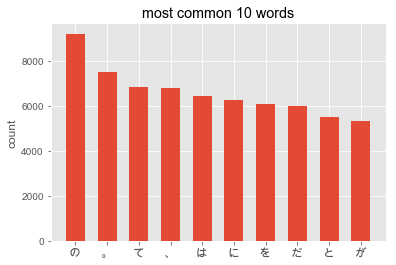

In [13]:
import matplotlib
matplotlib.rc('font', **{'family' : 'Arial Unicode MS'})
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline


def plot(title, X, Y, xlabel=None, ylabel=None, figsize=None, log=False):
    if figsize:
        plt.figure(figsize=figsize)
    plt.bar(range(len(X)), list(Y), 0.6, log=log)
    plt.xticks(range(len(X)), list(X), fontsize='large')
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


X, Y = zip(*counter.most_common())
plot('most common 10 words', X[:10], Y[:10], ylabel='count')

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

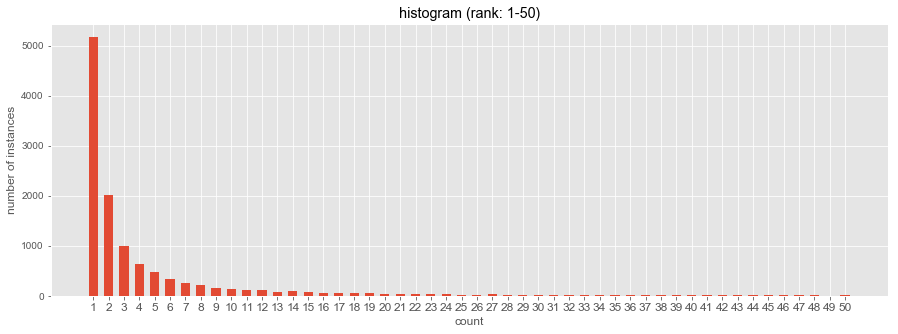

In [14]:
hist = Counter(Y)
X_hist, Y_hist = zip(*sorted(hist.most_common(), key=lambda x: x[0]))
plot('histogram (rank: 1-50)', X_hist[:50], Y_hist[:50], 
     xlabel='count', ylabel='number of instances', figsize=(15, 5))

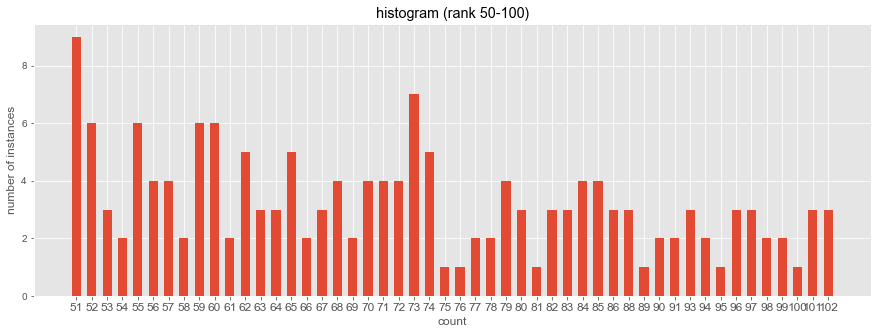

In [15]:
plot('histogram (rank 50-100)', X_hist[50:100], Y_hist[50:100], 
     xlabel='count', ylabel='number of instances', figsize=(15, 5))

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

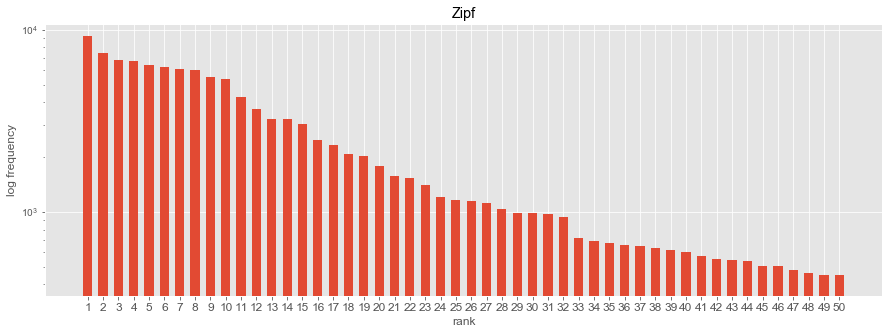

In [16]:
plot('Zipf', range(1, 51), Y[:50], 
     xlabel='rank', ylabel='log frequency', figsize=(15,5), log=True)